In [55]:
# Импортируем модули для расчётов
import numpy as np
import matplotlib.pyplot as plt
import math as m
# Определим параметры задачи
L = 20
CFL = 0.9
h = 0.125
M = int(L/h)+1
dt = CFL*h
T = 10
VecX = np.linspace(0, L, M)

# Зададим начальные данные
init = []
for el in VecX:
    init.append(m.sin(4*m.pi*el/L))
data_c = np.array(init)
data_LV = np.array(init)
data_new_c = np.zeros(M)
data_new_LV = np.zeros(M)

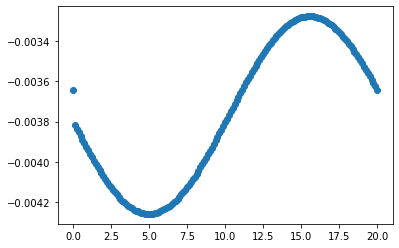

In [56]:
# Расчёт левым уголком
time = 0
for j in range(int(T/dt)):
    for i in range(1, M):
        data_new_c[i] = data_c[i] - dt/h * (data_c[i] - data_c[i-1])
    data_new_c[0] = data_new_c[M-1]
    data_c = data_new_c
    time+=dt

plt.scatter(VecX, data_c)
plt.show()

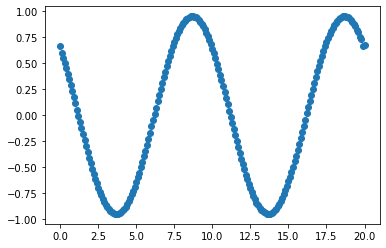

In [23]:
# Расчёт по схеме Лакса-Вендроффа
time = 0
for j in range(int(T/dt)):
    for i in range(1, M-1):
        data_new_LV[i] = data_LV[i] - dt/2/h * (data_LV[i+1] - data_LV[i-1])+(dt**2)/2/(h**2)*(data_LV[i+1] - 2*data_LV[i]+data_LV[i-1])
    data_new_LV[0]=data_LV[i] - dt/2/h * (data_LV[i+1] - data_LV[M-1])+(dt**2)/2/(h**2)*(data_LV[i+1] - 2*data_LV[i]+data_LV[M-1])
    data_new_LV[M-1]=data_LV[i] - dt/2/h * (data_LV[0] - data_LV[i-1])+(dt**2)/2/(h**2)*(data_LV[0] - 2*data_LV[i]+data_LV[i-1])
    data_LV = data_new_LV
    time+=dt

plt.scatter(VecX, data_LV)
plt.show()